# 房地产公司的数据科学家，主要步骤
1. 观察大局
2. 获得数据
3. 从数据探索和可视化中获得洞见
4. 机器学习算法的数据准备
5. 选择和训练模型
6. 微调模型
7. 展示解决方案
8. 启动、监控和维护系统


# 使用真实数据
- 流行的开放数据存储库
    - UC Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets.php)
    - Kaggle datasets (https://www.kaggle.com/datasets)
    - Amazon's AWS datasets (https://registry.opendata.aws/)

- 元门户站点（列出开放的数据存储库）
    - http://dataportals.org/
    - https://opendatamonitor.eu/
    - https://www.quandl.com/
    


StatLib 库中选择加州住房价格的数据集

该数据集基于 1990 年加州人口普查的数据

特意添加一个分类属性，并且移除一些特征


# 观察大局
## 框架问题
- 业务目标
- 设定问题
- 选择算法
- 评测模型
- 调整模型
- pipeline
- 是否已有解决方案
- 监督or无监督or强化学习？分类or回归？批量or在线？（MapReduce）

## 选择性能指标
**回归问题**
- RMSE
- MAE

## 检查假设
列举和验证目前为止做出的假设，良好习惯，初期检查


# 获取数据
## 创建工作区
## 下载数据


In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://gitee.com/aster/handson-ml"
HOUSING_PATH = "datasets/housing/"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "housing.tgz"

"""
input : 
    parameter1 : the url of dataset
    parameter2 : the dir of data
    
output:
    1 : mkdir the dir for housing_path in current workspace
    2 : download the dataset for housing.tgz to the housing_pah
    3 : tar the file of housing.tgz to the housing_path
"""
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [2]:
import pandas as pd

"""
input :
    parameter : the dir of data for housing
    
output:
    the DataFrame object of pandas
"""
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


## 快速查看数据结构


In [3]:
# the head method of DataFrame
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# the info method of DataFrame show the dataset description
# especially the total numbet of rows,
# the type of each attribute 
# and the number of non-null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# the attribute of ocean_proximity is object, and others are numeral
# and then the ocean_proximity is too much repeated, so it may be classification
# using the value_counts method could look the number of classification and the each classification frequency
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# the describe method could show the description of the type of numeral attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000837BC08>,
      dtype=object)

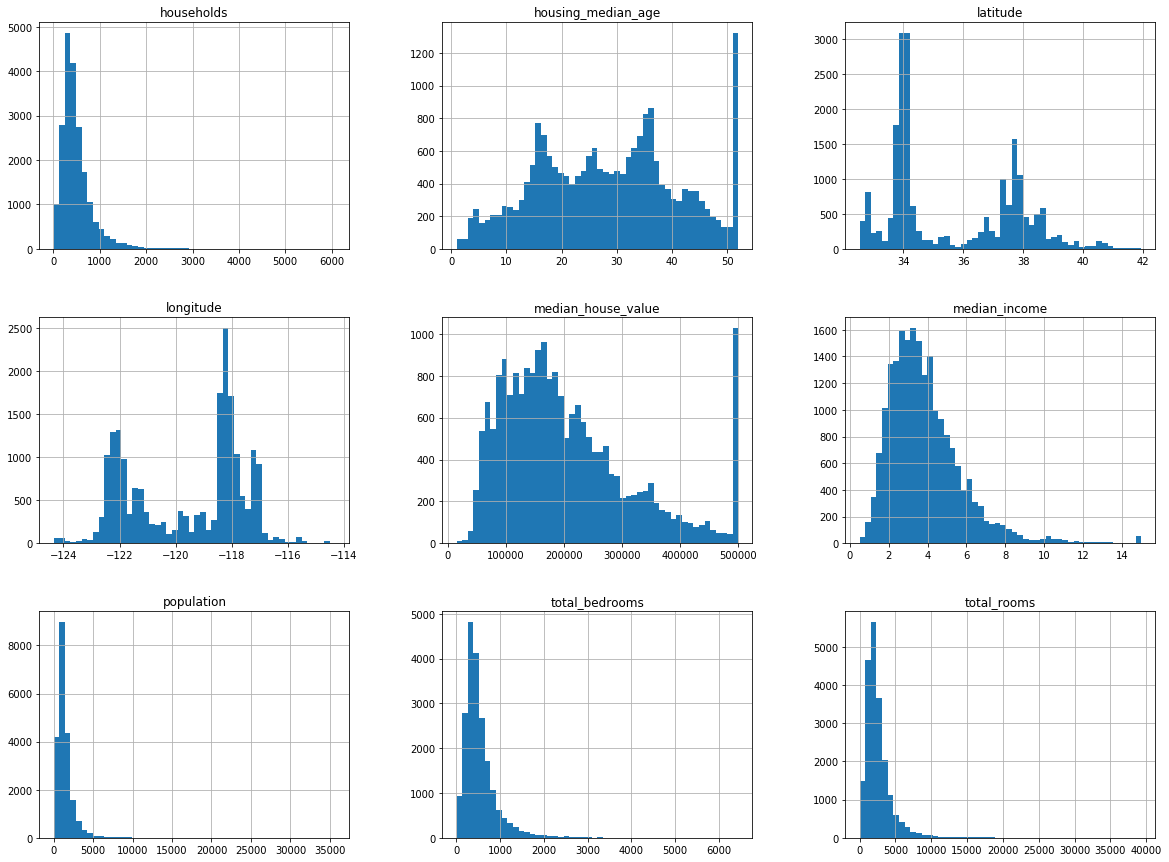

In [7]:
# the other method know numeral attribute is ploting the hist
# can plot each attribute or can plot all attributes of datasest in one picture
import matplotlib.pyplot as plt
%matplotlib inline

housing.hist(bins=50, figsize=(20,15))


## 创建测试集
经常被忽略但却是至关重要的

### 纯随机的抽样方法

In [8]:
# may be it is easy, just random select 20% (0.2) from the dataset 
import numpy as np

"""
input : 
    parameter1 : the data need to split
    parameter2 : the testset proportion ( 0-1), such as 0.2
    
output :
    the tuple of train_set and test_set
    such as : train_set, test_set = split_train_test()
"""
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# the function just has a little question: 
# each running just random, and then the all dataset will be insight to the algorithm
# solution 1 : set the random seed
#     such as : np.random.seed(42)
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# the solution 1 equivalent to the sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# solution 2 : first running and then save test_set

# solution 1 and solution 2 will interrupt when the update the dataset
# solution 3 : each instance using the unique identifier, 
#    and according to the identifier, select the instance into test_set
# such as using the hash (the identifier of hash)
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


# unfortunately，housing dataset has not the identifier sequence.
# simple solution using the row index as the ID, and there is no delete any row from the dataset
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# or solution using the stable attribute as the unique identifier
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_sest, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


### 分层抽样方法
保证每一个层次的实例数量比例保持一致

即就是测试集中每一层次实例数量比例 与 数据集中（训练集）中实例数量比例基本保持一致

不应该将层数分的太多，保证每一层应该有足够大

In [9]:
# using the median_income / 1.5 and limit the number of clssification
# and then using ceil function to get discrete categories
# and then the all siscrete categories which upper 5 change the 5 categoty  
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# accroding to the income_cat , stratified sampling (分层抽样)
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# according to income_cat , show the proportional distribution 
housing["income_cat"].value_counts() / len(housing)


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [10]:
# and then delete the new attribute income_cat，recovery the dataset
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

# 从数据探索和可视化中获得洞见
如果训练集数据量特别大，就可以抽样一个探索数据集，操作更加简便快捷一些（探索的速度和效率）

如果数据集数据量小，可以直接在整个训练集上操作

In [11]:
# create the copy for the train_set, and then no hurt to the train_set
housing = strat_train_set.copy()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


## 将地理数据可视化
地理位置信息（经度和纬度），区域分布图以便于可视化


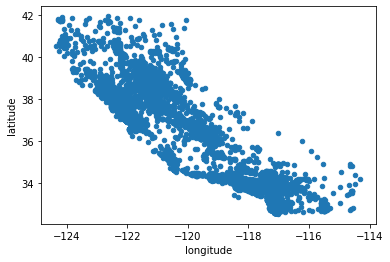

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude")

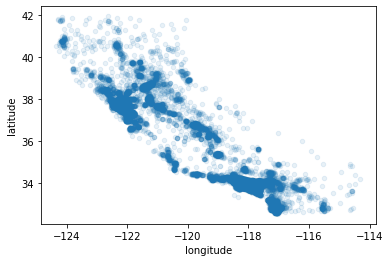

In [13]:
# set the alpha=0.1 in order to location of high-density data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

## 房价

每个圆的半径大小代表了每个地区的人口数量（s）

颜色代表价格（c）

使用一个名为 jet 的预定义颜色表（cmap）进行可视化，颜色范围从蓝色（低价）到红色（高价）


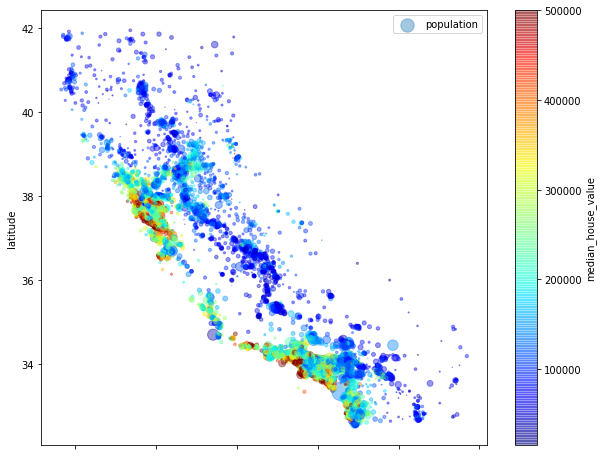

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,8),
             s=housing["population"]/100, label="population",
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True)

plt.legend()

如上图可视化可知
- 房屋价格与地理位置（靠海）和人口密度息息相关
- 一个很有用的方法，使用聚类算法来检测主群体，然后再为各个聚类中心添加一个新的衡量邻近距离的特征


### 寻找相关性
使用 corr 方法计算每对属性之间的标准相关系数（皮尔逊相关系数）

相关系数从 -1 变换到 1 

越接近 1 表示有越强的正相关，当收入中位数上升时，房价中位数也趋于上升

越接近 -1 表示有越强的负相关，维度和房价之间呈现轻微的负相关（越往北走，房价倾向于下降）

越接近 0 表示两者之间没有线性关系


In [15]:
corr_matrix = housing.corr()

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [16]:
# show the corr between medain_hous_valus and other attributes
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9319C8>,
      dtype=object)

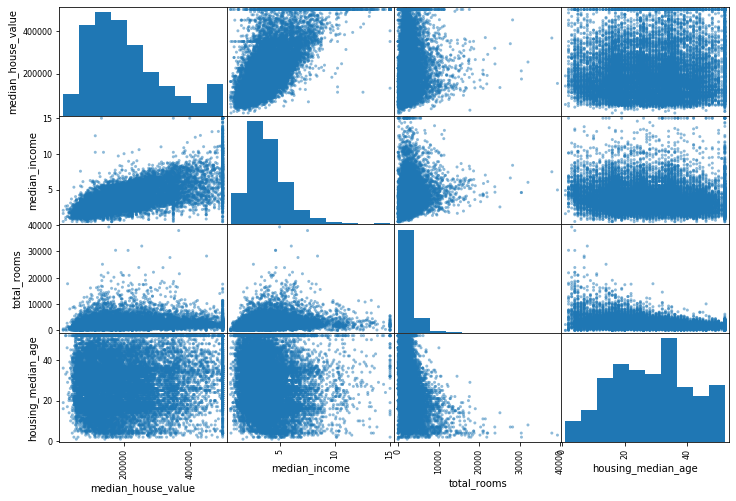

In [17]:
# the other method to detect the correlation :
# using the function scatter_matrix of pandas , plot the correlation between the numeral attribute 
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

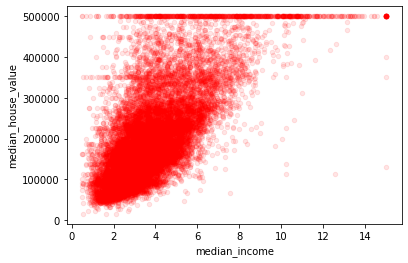

In [18]:
# the most influential attribute for median_housing_value is median_income
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, c="red")


如上图可知

在 50 万美元价格上限有一条清晰水平线

在 45 万美元价格附件有一条水平线

在 35 万美元价格附件也有水平线

为了避免 算法 学习之后重现这些怪异的数据，可能删除这些相应数据



### 试验不同属性的组合

探索数据并从中获得洞察的方法，在准备算法的输入数据前

1. 识别一些异常值，需要提前清洗
2. 发现不同属性之间相关性，特别与目标属性相关的属性
3. 某些属性的分布明显 “重尾” 分布，需要进行转换处理，取对数
4. 尝试不同属性之间的组合，试着创建新的属性


In [19]:
# create the new attributes 
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# show the corr
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# 学习算法的数据准备
编写函数来执行，而不是手动操作
- 可以在任何数据集上轻松实现这些转换（如获得更新的数据库）
- 可以建立起一个转换函数的函数库，项目之中重用
- 可以实时系统中使用这些函数来转换新数据
- 可以轻松尝试多种转换方式，那种转换的组合效果更佳

回到一个新的干净数据集（复制 strategic_train_set）

然后将预测器和标签分开，两者不一定使用想用的转换方式

drop 函数会创建新副本，不影响 strat_train_set

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


## 数据清理
缺失值（total_bedrooms） 处理
- 放弃缺失值相应的地区（对应的行数据） —— DataFrame.dropna()
- 放弃缺失值严重的属性特征字段 —— DataFrame.drop()
- 填充缺失值（0、平均数、中位数等等）—— DataFrame.fillna()


In [21]:
housing.dropna(subset=["total_bedrooms"])
housing.drop("total_bedrooms", axis=1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)


17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16512, dtype: float64

scikit-learn 提供处理缺失值：imputer

首先创建一个 imputer 实例，指定用属性的中位数值替换该属性的缺失值

由于中位数只能在数值型属性上计算，需要创建一个非文本属性的数据副本（ocean_proximity 文本属性）

使用 fit 方法将 imputer 实例适配到训练集

imputer 计算每个属性的中位数值，并将结果储存在其实例变量 ststistics_ 中


In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [23]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [24]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

现在可以使用这个 imputer 将缺失值替换为中位数完成训练集的转换


In [25]:
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [26]:
# set the results array as DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


### 处理文本和分类属性
大部分算法都是与数值进行交互

将文本标签转化为数字

In [27]:
# sklearn provide the transform class called LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

housing_cat = housing["ocean_proximity"]

housing_cat_encoded = encoder.fit_transform(housing_cat)

housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

可以使用 classes_ 属性查看编码器学习的映射关系

In [28]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

以上结果显示，文本属性依次被编码为 0、1、2、3、4

这种方式容易产生问题：算法会以为两个相近的数字比两个离得远的数字更为相似一些？？？

solution：给每一个类别创建一个二进制的属性，即就是

当类别是 <1H OCEAN 时，一个属性为 1（其他全部为 0 ）

当类别是 INLAND 是，另一个属性为 1（其他全部为 0 ）

一次类推，这就是独热编码，只有一个属性为热（1）其他为冷（0）


sklearn 提供 OneHotEndoer 编码器，将整数分类值转换为独热向量

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# fit_transform need Two-dimensional array
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

得到的结果是一个 scipy 的稀疏矩阵

使用大量内存来储存 0 ，浪费内存，SciPy 只储存非零元素的位置

使用 toarray 方法将转换为密集的Numpy 数组，内存占的多


In [30]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

使用 LabelBinarizer 类可以一次性解决以上两个步骤

1. 从文本类别转化为整数类别
2. 从整数类别转换为独热向量


In [31]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()

housing_cat_1hot = encoder.fit_transform(housing_cat)

housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

这是默认返回一个密集型的Numpy数组

设置 sparse_output=True 给 LabelBinarizer 构造函数，得到稀疏矩阵


In [32]:
encoder = LabelBinarizer(sparse_output=True)

housing_cat_1hot = encoder.fit_transform(housing_cat)

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int32'>'
	with 16512 stored elements in Compressed Sparse Row format>

### 自定义转换器 

fit()\transform(\fit_transform()

虽然 sklearn 提供许多有用的转换器，有时需要自定义清理操作或者组合特定属性等任务，编写自己的转换器
                
sklearn 依赖与鸭子类型（duck typing）编译，可以与sklearn自身的功能（如流水线pipeline）无缝衔接
                
创建一个类，然后添加这三个方法：fit() 返回自身、transform()、fit_transform()

如果添加 TransformerMixin 作为基类，可以直接得到最后一个方法

同时，添加 BaseEstimator 作为基类（并在构造函数里面避免 *args 和 *kargs），
能额外获得非常有用的自动调整超参数的方法（get_params()和set_params()）

例如，前面讨论的组合属性，简单的转换器类，用来添加组合后的属性

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing else to do 
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)


在上例子中，转换器有一个超参数 add_bedrooms_per_room 默认设置为 True （提供合理的默认值通常很有帮助）

这个超参数可以轻松知晓添加这个属性是否有助于算法

广泛来说，如果对数据准备的步骤没有充分的信心，可以添加超参数进把关，

这些数据准备步骤的执行愈自动化，自动尝试的组合也就越多，从而更大可能找到一个重要组合，节省大量时间


### 特征缩放

最重要也是最需要应用到数据上的转换器

如果输入的数值属性具有非常大的比例差异，导致算法的性能表现不佳

案例中的房屋数据就是这样，房间总数范围从6到39320，而收入中位数的范围是0到15

noting：目标值不需要缩放

同比例缩放所有属性，常用方法：最小-最大缩放 、标准化

#### 最小-最大缩放（有称之 归一化）

将数值重新缩放使其最终范围归于 0 到 1 之间

实现方法是将值减去最小值并除于最大值和最小值的差

sklearn 提供 MinMaxScaler 转换器，通过调整超参数 feature_range 进行对范围进行更改，不是 0-1

#### 标准化

首先将值减去平均值（所以标准化值的均值总是零），然后除以方差，从而使得结果分布具备单位方差

不同于最小-最大缩放，标准化不会将值绑定到特定范围，对某些算法而言，可能是一个问题，但是标准化的方法受异常值的影响非常小

sklearn 提供 StandardScaler 转换器，进行标准化

### 转换流水线

许多数据转换步骤需要正确的顺序来执行

sklearn 提供 Pipeline 来支持这样的转换

下面是一个数值属性的流水线例子


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)


Pipeline 构造函数会通过一系列名称/估算器的配对来定义步骤的序列

除了最后一个是估算器之外，前面都必须是转换器（也就是说必须 fit_transform() 方法）

当调用流水线的 fit() 方法时，会在所有转换器上按照顺序依次调用 fit_transform() ，
将一个调用的输出作为参数传递给下一个调用方法，直到传递到最终的估算器，则只会调用 fit() 方法

流水线的方法与最终的估算器的方法相同

在本例中，最后一个估算器是 StandardScaler ，是个转换器，
因此 Pipeline 有transform() 方法可以按照顺序将所有的转换应用到数据中

已经有了一个处理数值的流水线，接下来需要在分类值上应用 LabelBinarizer

sklearn 提供了 FeatureUnion 类

只需要提供一个转换器列表，当 transform() 方法被调用时，它会 并行 运行每一个转换器的 transform() 方法，
等待它们的输出，然后将它们连接起来，返回结果（类似 MapReduce 方式）

一个完整的处理数值和分类属性的流水线可能如下所示：

In [35]:
# create the class CategoricalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
 
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """
 
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown
 
    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """
 
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)
 
        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)
 
        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")
 
        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape
 
        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]
 
        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))
 
        self.categories_ = [le.classes_ for le in self._label_encoders_]
 
        return self
 
    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)
 
        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])
 
            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])
 
        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)
 
        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)
 
        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]
 
        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out


In [36]:
from sklearn.pipeline import FeatureUnion
from sklearn_features.transformers import DataFrameSelector

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_attribs)),
                        ('imputer', SimpleImputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),])

cat_pipeline = Pipeline([
                        ('selector', DataFrameSelector(cat_attribs)),
                        ('label_binarizer', CategoricalEncoder(encoding="onehot-dense")),])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline), ])

# running the full_pipeline
housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [37]:
housing_prepared.shape

(16512, 16)

每条字流水线从选择器转换器开始：只需要挑出所需的属性（数值或分类），删除其余的数据，
然后将生成的 DataFrame 转换为 Numpy 数组，数据转换就完成了

sklearn 中没有可以用来处理 pandas DataFrame 的，因此需要为此任务编写一个简单的自定义转换器


In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values


# 选择和训练模型
1. 框出了问题，获得了数据
2. 数据探索
3. 对训练集和测试集进行了抽样并编写了转换流水线，从而可以自动清理和准备算法的数据
4. 现在是选择算法模型并进行训练了


## 培训和评估训练集
1. 训练一个线性回归模型

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Prediction:\t", lin_reg.predict(some_data_prepared))
print("=================================================")
print("Labels:\t\t", list(some_labels))

Prediction:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


可以正常工作，但是预测不是很准确

可以使用 sklearn 的 mean_squared_error 函数测量训练集上回归模型的 RMSE

In [47]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [48]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

该结果虽然比什么都没有要好，但显然不是一个好看的成绩：

大都数地区的 median_housing_values 分布在 120 000 到 265 000 美元之间，所以典型的预测误差达到 68628 美元只能算是差强人意

这就是一个典型的模型对训练数据拟合不足的案例

这种情况的发生，通常意味着这些特征可能无法提供足够的信息来做出更好的预测，或者是模型本身不够强大。

想要修正拟合不足，可以通过选择更强大的模型，或者是为算法训练提供更好的特征，或者减少对模型的限制等等方法

接下来试一试复杂的模型：训练 DecisionTreeRegressor 能够从数据中找到复杂的非线性关系


In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

# train the DecisionTreeRegressor model
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

why? 完全没有错误？这个模型真的做到完美？

更有可能是这个模型对数据严重过度拟合了，怎么确定过拟合？

在对算法模型有信心之前，都不要触碰测试集

这里需要将训练集中一部分数据用于训练，另一部分用于模型的验证

## 使用交叉验证来更好的进行模型评估
评估决策时模型的一种方法是使用 train_test_split 函数对训练集划分为较小的训练集和验证集，
然后根据这些较小的训练集来训练模型，并对其进行评估。虽然有一定工作量，但是不会太难，而且非常有效。

另一个不错的选择就是使用 sklearn 的交叉验证功能。

下面是执行 K-折（K-fold）交叉验证的代码：将训练集随机划分 10 个不同的子集，
每一个子集称之为一个折叠（fold），然后对决策树模型进行 10 次训练和评估——每次挑选一个折叠进行评估，其他9个折叠进行训练。
最后的结果是一个包含 10 次评估分数的数组：

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

# sklearn 的交叉验证功能更加倾向于使用效用函数（越大越好）而不是成本函数（越小越好）
# 所以计算分数的函数实际上是负值 MSE, 计算 RMSE 之前要先计算 -scores
rmse_scores = np.sqrt(-scores)


In [53]:
def display_scores(socres):
    print("Scores:", socres)
    print("Mean:", socres.mean())
    print("Standard deviation:", socres.std())
    
display_scores(tree_rmse_scores)

Scores: [69176.7072193  65249.83606276 71648.7942352  69635.84458392
 71928.7528625  75472.205993   70605.47267181 71829.88010315
 77364.12301671 69480.0399989 ]
Mean: 71239.16567472472
Standard deviation: 3203.4127883696187


这次决策树模型好像不如之前表现好，而且看起来比线性回归模型表现更加糟糕

注意，交叉验证不仅可以得到模型的性能评估值，还可以衡量该评估的精确度（即其标准偏差）

决策树模型得出评分约 71200，上下浮动 +(-)3200


In [58]:
# count the scores for LineRegression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


根据模型评估结果显示，决策树模型严重过拟合了，表现的比线性回归模型还要糟糕

再试一试 RandomForestRegressor 随机森林，通过对特征的随机子集进行多个决策树的训练，然后对其预测取平均

在多个模型的基础上建立模型，称之为集成学习，进一步推动机器学习算法的好方法


In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [62]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [63]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


随机森林模型的表现就要好一点，但请注意，训练集上的分数依然低于验证集，这意味着该模型依然对训练集过度拟合

解决过拟合方案
1. 简化模型
2. 约束模型（正规化，正则化）
3. 获得更多训练数据

尝试其他算法模型，没有必要耗费过多时间调整超参数，目的是筛选（2-5）个有效模型

### 模型保存以及加载
- 每一个尝试过的模型应该保存，可以轻松回到想要的模型中
- 同时保存超参数以及训练过的参数，以及交叉验证的评分和实际预测的结果
- 轻松对比不同模型类型的评分，以及不同模型造成的错误类型
- 通过 Python 的 pickel 模型或者 sklearn.external.joblib 可以保存模型，有效将大型 Numpy 数组序列化

from sklearn.external.joblib import joblib

joblib.dump(my_model, "my_model.pkl")

my_model_loaded = joblib.load("my_model.pkl")

## 微调模型
- 一种微调的方法是手动调整超参数，找到一组很好的超参数组合
- sklearn 的 GridSearchCV 来替代搜索

### 网格搜索
GridSearchCV， 需要进行实验的超参数是什么，以及需要尝试的值，使用交叉验证来评估超参数值的所有可能组合

搜索 随机森林模型 的超参数的最佳组合

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

noting: 当不知道超参数应该赋予什么值时，简单的方法就是连续尝试 10 的幂次方（如果想得到更细粒度的搜索，参考本例中 n_estimators 超参数）

这个 param_grid 告诉 sklearn，首先评估第一个 dict字典中的 n_estimators 和 max_features 的所有参数组合（3 * 4 = 12）

接着，尝试第二个 dict字典中的超参数值的所有组合（2 * 3 = 6），超参数 bookstrap 需要设置为 False（True 为默认值）

网格搜索将探索 随机森林模型 超参数 12 + 6 = 18 种组合，并对每一个模型进行 5 次训练（5-k），
也即是 18 * 5 = 90 次训练，完成后获得最佳参数组合


In [65]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

因为被评估的 n_estimators 最大值是 30 ，可以试一试更高的值，评分可能会继续改善

也可以直接得到最好的估算器


In [66]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

如果 GridSearchCV 被初始化 refit = True (这就是默认值)，
那么一旦通过交叉验证最佳估算器，将在整个训练集上重新训练

当然还有评估分数：

In [67]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64116.30762512309 {'max_features': 2, 'n_estimators': 3}
55633.717535713964 {'max_features': 2, 'n_estimators': 10}
52780.73737469503 {'max_features': 2, 'n_estimators': 30}
60506.15355745238 {'max_features': 4, 'n_estimators': 3}
53107.59598311906 {'max_features': 4, 'n_estimators': 10}
50498.36301701737 {'max_features': 4, 'n_estimators': 30}
58638.209655299404 {'max_features': 6, 'n_estimators': 3}
52140.72467960804 {'max_features': 6, 'n_estimators': 10}
49832.8202546769 {'max_features': 6, 'n_estimators': 30}
58781.97692823978 {'max_features': 8, 'n_estimators': 3}
52167.05402394576 {'max_features': 8, 'n_estimators': 10}
50099.83085177515 {'max_features': 8, 'n_estimators': 30}
62937.23644111255 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54306.11411434571 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60516.74765468587 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.433097378285 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

在本例中，最佳解决方案是将超参数 max_features = 6， n_estimators = 30，
这个组合的 RMSE = 49832，高于之前使用的默认超参数值的分数52643，成功将模型调整大最佳模式

noting : 数据准备的步骤也可以当做超参数处理
    
可以处理自动寻找处理问题的最佳方法，例如处理异常值、缺失特征以及特征选择等等

## 随机搜索
- 当探索的组合数量较少，网格搜索是一个不错的选择
- 当超参数的搜索范围较大，通常优先选择使用 RandomizedSearchCV
- RandomizedSearchCV 与 GridSearchCV 大致相同，但不会尝试所有可能的组合，
- 而是在每次迭代中为每个超参数选择一个随机值，然后对一定数量的随机组合进行评估
- RandomizedSearchCV 显著特点
    - 如果运行随机搜索 1000 个迭代，那么将会探索每个超参数的 1000 个不同的值（不是想网格搜索方法那样每个超参数探索几个少量值）
    - 通过简单地设置迭代次数，更好地控制要分配给探索的超参数的计算预算
    

## 集成方法
- 这是一种微调系统的方法，将表现最优的模型组合起来
- 组合（集成）的模型通常比单一模型表现更佳，特别是在单一模型会产生不同类型的错误时

## 分析最佳模型以及其错误
通过检查最佳模型，可以得到一些好的洞见

比如在进行准确预估时， RandomForestRegressor 可以指出每个属性的相对重要程度


In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.32698732e-02, 6.42011878e-02, 4.24727181e-02, 1.68860568e-02,
       1.73185988e-02, 1.87452363e-02, 1.63416995e-02, 3.49965407e-01,
       4.82862212e-02, 1.08614115e-01, 8.45941697e-02, 1.29965594e-02,
       1.37563174e-01, 4.71826404e-05, 4.56596732e-03, 4.13183403e-03])

将这些重要性分数显示在对应的属性名称旁边

In [70]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_one_hot_attribs = list(encoder.classes_)

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.3499654069699606, 'median_income'),
 (0.13756317386482697, 'INLAND'),
 (0.10861411459826023, 'pop_per_hhold'),
 (0.08459416966529386, 'bedrooms_per_room'),
 (0.07326987318739454, 'longitude'),
 (0.06420118781761039, 'latitude'),
 (0.04828622115891401, 'rooms_per_hhold'),
 (0.0424727180799119, 'housing_median_age'),
 (0.018745236258439157, 'population'),
 (0.017318598789214247, 'total_bedrooms'),
 (0.016886056757681633, 'total_rooms'),
 (0.01634169945262524, 'households'),
 (0.012996559407370949, '<1H OCEAN'),
 (0.004565967318569206, 'NEAR BAY'),
 (0.00413183403350142, 'NEAR OCEAN'),
 (4.71826404256826e-05, 'ISLAND')]

有了这些信息之后，可以尝试删除一些不太有用的特征

了解系统产生的具体错误，尝试了解是怎么产生的，怎么解决（通过添加额外特征，删除没有信息的特征，清除异常值等等）

## 通过测试集评估系统
- 通过训练后，有了一个表现足够优秀的系统，用测试集评估最终模型
- 从测试集中获取预测器和标签，运行模型 full_pipeline 来转换数据，然后在测试集上评估最终模型


In [73]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_mse)
print("==================")
print(final_rmse)

2248612400.892975
47419.53606788003


如果之前进行过大量的超参数调整，此时的评估结果通常会逊于之前使用交叉验证时的表现结果
（因为通过不断的调整，系统在验证数据上终于表现良好，在未知数据上可能达不到怎么好的效果）

此时一定要忍住调整超参数的诱惑，不要试图努力让测试集的结果也变得好看，因为这些改进在泛化到新数据集时又会变得徒劳无功

现在进入项目的预启动阶段：
- 展示解决方案（强调学习了什么，有什么用，什么没有用，基于什么假设，系统的限制等等）
- 记录所有事情，通过清晰的可视化和易于记忆的陈述方式，制作魅力演示文稿


# 启动、监控和维护系统
- 编写监控代码，以定期检查系统的实时性能表现，同时在性能下降时触发警报
- 需要捕捉的不仅是突然的系统崩溃，系统性能退化值得关注
- 需要定期的使用新数据训练模型

评估系统性能，需要对系统的预测结果进行抽样并评估

通常这一步需要人工分析，分析师是领域专家

还需要评估输入系统的数据的质量。质量较差的数据（如用来发送随机值的传感器故障，或者是其他团队的输出变得过时）会导致性能下降，
但是降到触发警报还需要一段时间，所有需要监控输入数据，捕捉这个异常信号

一般来说需要使用新数据定期训练模型，这个过程需要自动化


# summary
- 机器学习项目大概是什么样子的流程
- 大部分工作在：数据准备、构建监控工具、建立人工评估的流水线、自动化定期训练模型
- 机器学习算法固然重要，但是对于整个流程熟悉也是前提
- 不是所有的时间都是用来掌握高级算法，而对于整个流程视而不见
- kaggle 是一个不错的平台，选择感兴趣的数据集，尝试整个流程
- kaggle 给定数据集，明确目标，还有小伙伴的经验分析


In [75]:
# 取得当前时间戳
import time
#格式化时间戳为标准格式
time.strftime('%Y.%m.%d-%H:%M:%S',time.localtime(time.time()))

'2020.07.10-21:26:05'